In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

## Data Preprocessing 

### Importing the Datasets

In [4]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:,1:2].values

### Feature Scailing 

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a Data Structure With 60 Timpesteps and 1 Output

In [8]:
x_train = []
y_train = []
for i in range(60,1258): 
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
x_train,y_train = np.array(x_train), np.array(y_train)

In [9]:
x_train.shape

(1198, 60)

In [10]:
y_train.shape

(1198,)

### Reshaping 

In [12]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

## Building the RNN

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [15]:
# initialize the RNN
regressor = Sequential() 

#### Adding the first LSTM layer and some dropout regularization

In [17]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(rate = 0.2))

C:\Users\kidus\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### Adding the second LSTM layer and some dropout regularization

In [19]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

#### Adding the third LSTM layer and some dropout regularization

In [21]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

#### 4th LSTM layer with some dropout regularization

In [23]:
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.2))

#### Adding the output layer

In [25]:
regressor.add(Dense(units = 1))

### COmpile the RNN

In [27]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Training the RNN

In [29]:
regressor.fit(x_train,y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 0.0910
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0073
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 0.0057
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.0053
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 0.0059
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0043
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.0049
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.0045
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0040
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.0044
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0048
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.0040
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.0040
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0040
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - l

## Making Predictions and Visualizing the result 

### Importing the real stock price of 2017 

In [32]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

####  Getting the predicted stock price

In [34]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis = 0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

x_test = []
for i in range(60,80): 
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)

#### Reshaping

In [36]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [37]:
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step


### Visualizing the results

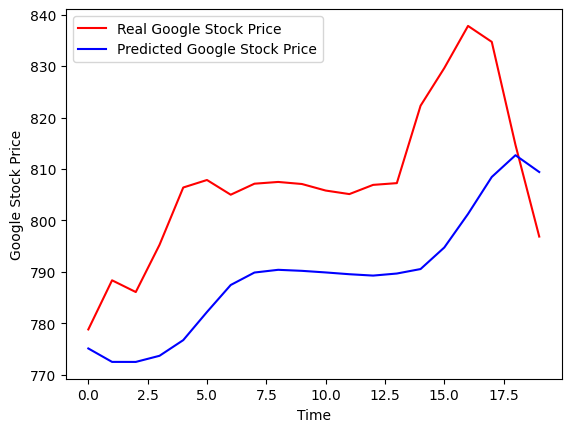

In [39]:
plt.plot(real_stock_price, color = 'red',label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue',label = 'Predicted Google Stock Price')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()